In [15]:
################################### NumPy #######################################

import numpy as np # written on C

# multiplication sequence by 2 to work faster in NumPy compared with Python
my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

%time my_arr = my_arr * 2
"""CPU times: user 938 μs, sys: 149 μs, total: 1.09 ms
Wall time: 1.1 ms"""

%time my_list = [x * 2 for x in my_list]
"""CPU times: user 12.1 ms, sys: 14.8 ms, total: 26.9 ms
Wall time: 36.4 ms"""


CPU times: user 1.32 ms, sys: 0 ns, total: 1.32 ms
Wall time: 2.13 ms
CPU times: user 12.1 ms, sys: 14.8 ms, total: 26.9 ms
Wall time: 36.4 ms


In [10]:
######################################## 4.1 NDARRAY ############################

import numpy as np

data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data
"""array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])"""
data * 10 
"""array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])"""
data + data
"""array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])"""

# attributes of ndarray
data.shape # size array by axes YX:  (2, 3)
data.dtype # similar types in array
data.ndim # count of dimension

# create ndarray object from any sequence
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1 # array([6. , 7.5, 8. , 0. , 1. ]), type of elements: float64
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
"""array([[1, 2, 3, 4],
       [5, 6, 7, 8]])"""
arr2.ndim # 2 dimension

np.zeros(10) # array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
np.empty((2, 3, 2)) # many garbage here
"""
array([[[2.877995e-316, 0.000000e+000],
        [0.000000e+000, 0.000000e+000],
        [0.000000e+000, 0.000000e+000]],

       [[0.000000e+000, 0.000000e+000],
        [0.000000e+000, 0.000000e+000],
        [0.000000e+000, 0.000000e+000]]])
"""
np.arange(10) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

arr3 = np.array([1, 2, 3], dtype=np.float64) # point type of array

# change array type
# astype() create copy of source array !
arr4 = np.array([1, 2, 3, 4, 5])
arr4.dtype # dtype('int64')
float_arr1 = arr4.astype(np.float64)
float_arr1 # array([1., 2., 3., 4., 5.])
float_arr1.dtype # dtype('float64')

arr5 = np.array([1.4, 5.9, 2.0, -14.34, -3.7])
arr6 = arr5.astype(np.int32)
arr6 # array([  1,   5,   2, -14,  -3], dtype=int32) discarded after the comma

int_array = np.arange(10)
caliber = np.array([.22, 1.24, .87, 5.34], dtype=np.float64)
int_array.astype(caliber.dtype) # array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])  copy of int_array
int_array # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  not change

zeros_uint32 =  np.zeros(8, dtype="u4") # uint4 so 0...4*10^9
zeros_uint32 # array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

####################### indexing and cuting ###############################

arr7= np.arange(10)
arr7 # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
arr7[5] # 5 strange ! because index begin by 0 and values as well
arr7[5:8] #array([5, 6, 7]) SLICE
arr7[5:8] = 12 # array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9]) the source array has changed

# SLICE is a view of source array
arr_slice = arr7[5:8] # array([12, 12, 12]) it is view of arr7
arr_slice[1] = 12345
arr7 # array([    0,     1,     2,     3,     4,    12, 12345,    12,     8, 9])
arr_slice[:] = 64
arr7 # array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])
# arr7[5:8].copy() 

arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[1] # array([4, 5, 6])
arr2d[0][2] # 3 recursively get element 
arr2d[0, 2] # 3 the same but better!

# 2X2X3
arr3d = np.array([[[1,2,3], [4,5,6]],[[7,8,9], [10,11,12]]])
arr3d 
"""
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])"""
arr3d[1, 0, 2] # 9

old_values = arr3d[0].copy()
old_values
"""array([[1, 2, 3],
       [4, 5, 6]])"""
arr3d[0] = 42 # assign a scalar value
arr3d
"""array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])"""

arr3d[0] = old_values
arr3d
"""array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])"""

# indexing at a time
arr3d[1, 0] # array([7, 8, 9])

# indexing in two passes
x = arr3d[1]
x
"""array([[ 7,  8,  9],
       [10, 11, 12]])"""
x[0] # array([7, 8, 9])
x[0, 1] = 88
"""array([[ 7,  88,  9],
       [10, 11, 12]])"""

# indexing by slice
# so we get arrays of a smaller dimension
arr7 # array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])
arr7[1:6] # array([ 1,  2,  3,  4, 64])

arr2d
"""array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])"""
arr2d[0:2]
"""array([[1, 2, 3],
       [4, 5, 6]])"""

arr2d[:2, 1:]  # we can't to use 3-e dimension because source array have dimension is equal to 2
"""array([[2, 3],
       [5, 6]])"""
# arr2d[:2, 1:, 1:] # ERROR!

# but...
low_dim_slice = arr2d[1, :2]
low_dim_slice # array([4, 5])
low_dim_slice.shape # (2,)

# !!!
arr2d[:3, 2] # array([3, 6, 9])  get 3 rows and 3th column ----> deploy column as row !
arr2d[:3, 2:]#                                             -----> save column as column
"""array([[3],
       [6],
       [9]])"""

arr2d[:, 0:1]
"""array([[1],
       [4],
       [7]])"""

arr2d[:2, 1:] = 0 # 
arr2d
"""array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

"""

####################  bool indexing #################################

# when selecting always create copy of sorce object)
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe',  'Joe'])
data = np.array([[4,7],  [0,2], [-5,6], [0,0], [1,2], [-12,-4], [3,4]])

names == 'Bob' # array([ True, False, False,  True, False, False, False])
data[names == 'Bob']
"""array([[4, 7],
       [0, 0]])"""

data[names == 'Bob', 1:]
"""array([[7],
       [0]])"""
data[names == 'Bob', 1] # array([7, 0])

names != 'Bob'    # array([False,  True,  True, False,  True,  True,  True])
~(names == 'Bob') # array([False,  True,  True, False,  True,  True,  True])

data[~(names == 'Bob')]
"""array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])"""

# or
cond = names == 'Bob'
data[~cond]
"""array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

"""

mask = (names == 'Bob') | (names == 'Will')
data[mask]
"""array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])"""

# change data with bool index
data[data < 0] = 0
"""array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])"""

data[names != "Joe"] = 7
"""array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])"""

# fancy indexing
arr_fi = np.zeros((8, 4)) 
"""array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])"""

for i in range(8):
    arr_fi[i] = i

arr_fi
"""array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])"""

arr_fi[[4, 3, 0, 6]] # sort by index+1. Here using [[]]
"""array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])"""

arr_fi[[-3, -5, -7,]]
"""array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])"""

arr_fi = np.arange(32).reshape(8, 4)
"""array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])"""

arr_fi[[1, 5, 7, 2], [0, 3, 1, 2]]
"""array([ 4, 23, 29, 10])"""

arr_fi[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
"""array([[ 4,  7,  5,  6],
          [20, 23, 21, 22],
          [28, 31, 29, 30],
          [ 8, 11,  9, 10]])"""

arr_fi[[1, 5, 7, 2], [0, 3, 1, 2]] = 0 # change data
arr_fi
"""array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])"""

arr_fi_ref = arr_fi
arr_fi_ref[[1, 5, 7, 2], [0, 3, 1, 2]] = 777
arr_fi_ref
"""array([[  0,   1,   2,   3],
       [777,   5,   6,   7],
       [  8,   9, 777,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19],
       [ 20,  21,  22, 777],
       [ 24,  25,  26,  27],
       [ 28, 777,  30,  31]])"""

arr_fi
"""array([[  0,   1,   2,   3],
       [777,   5,   6,   7],
       [  8,   9, 777,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19],
       [ 20,  21,  22, 777],
       [ 24,  25,  26,  27],
       [ 28, 777,  30,  31]])

"""

arr_fi_copy = arr_fi[[1, 5, 7, 2]][:, [0, 3, 1, 2]]
arr_fi_copy[[0, 1, 2, 3], [0, 1, 2, 3]]= 0
arr_fi_copy
"""array([[ 0,  7,  5,  6],
       [20,  0, 21, 22],
       [28, 31,  0, 30],
       [ 8, 11,  9,  0]])"""

arr_fi # don't changed because 'arr_fi_copy' is not VIEW
"""array([[  0,   1,   2,   3],
       [777,   5,   6,   7],
       [  8,   9, 777,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19],
       [ 20,  21,  22, 777],
       [ 24,  25,  26,  27],
       [ 28, 777,  30,  31]])

"""
 # TRANSPOSITION (for operations with matrix)
arr = np.arange(15).reshape(3, 5)
"""array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

"""
arr.T  # so rows became a columns
"""array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])"""

arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
"""array([[ 0,  1,  0],
          [ 1,  2, -2],
          [ 6,  3,  2],
          [-1,  0, -1],
          [ 1,  0,  1]])"""

arr.T
"""array([[ 0,  1,  6, -1,  1],
          [ 1,  2,  3,  0,  0],
          [ 0, -2,  2, -1,  1]])"""

np.dot(arr.T, arr) # multiplication of two matrix
"""array([[39, 20, 12],
          [20, 14,  2],
          [12,  2, 10]])"""
arr.T @ arr
"""array([[39, 20, 12],
          [20, 14,  2],
          [12,  2, 10]])"""

arr.swapaxes(0, 1) # as arr.T but more preferably
"""array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])"""


array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

In [24]:
##########################  4.2.GENERATING PSEUDORANDOM NUMBERS ############################

import numpy as np

samples = np.random.standard_normal(size=(4, 4))
"""array([[-0.37539587,  1.68634986,  0.86702292, -0.59474251],
       [-1.15945437,  0.84535131,  0.35842186,  0.91033165],
       [ 0.65543747, -0.05855837, -1.37493374,  1.42142064],
       [-1.78889969, -0.89602443,  0.99726101, -0.31536299]])"""

from random import normalvariate
N = 1_000_000
%time samples = [normalvariate(0, 1) for _ in range(N)]
"""CPU times: user 239 ms, sys: 15.6 ms, total: 254 ms
Wall time: 282 ms"""

%time np.random.standard_normal(N)
"""CPU times: user 10.3 ms, sys: 6.96 ms, total: 17.3 ms
Wall time: 20.5 ms"""

rng = np.random.default_rng(seed=12345) # small configuration of generator/ seed - begining condition of generator
data = rng.standard_normal((2, 3))
"""array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])"""

type(rng) # numpy.random._generator.Generator

CPU times: user 233 ms, sys: 11.6 ms, total: 244 ms
Wall time: 278 ms
CPU times: user 12.6 ms, sys: 18 μs, total: 12.6 ms
Wall time: 12.7 ms


numpy.random._generator.Generator

In [57]:
########################### 4.3. UNIVERSAL FUNCTIONS. FAST STEP-BY-STEP OPERATIONS #######################################
import numpy as np

arr = np.arange(10)
#  unary function (1 array on input)
np.sqrt(arr) # using at the same time to all elements
np.exp(arr) # e ^ arr[n], where n = 0, 1, 2,...9

# binary function (2 array on input)
rng = np.random.default_rng(seed=12345)
x = rng.standard_normal(8)
y = rng.standard_normal(8)
np.maximum(x, y) # step-by-step element search in x and y

# return 2 array
arr = rng.standard_normal(7) * 5
arr
"""array([-5.31821358,  6.5085725 ,  3.73936471,  4.90437955, -0.55209344,
        2.33959265,  4.45303575])"""

remainder, whole_part = np.modf(arr)
remainder
"""array([-0.31821358,  0.5085725 ,  0.73936471,  0.90437955, -0.55209344,
        0.33959265,  0.45303575])"""
whole_part
"""array([-5.,  6.,  3.,  4., -0., 2.,  4.])"""

# using out-param
arr = np.random.default_rng(seed=12345).standard_normal(7)
"""array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465, -1.3677927 ])"""
out1 = np.zeros_like(arr) # array([0., 0., 0., 0., 0., 0., 0.])
np.add(arr, 1)
"""array([-0.42382504,  2.26372846,  0.12933826,  0.74082677,  0.92465669,
        0.25911535, -0.3677927 ])"""
np.add(arr, 1, out = out1)
out1
"""array([-0.42382504,  2.26372846,  0.12933826,  0.74082677,  0.92465669,
        0.25911535, -0.3677927 ])"""

array([-0.42382504,  2.26372846,  0.12933826,  0.74082677,  0.92465669,
        0.25911535, -0.3677927 ])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

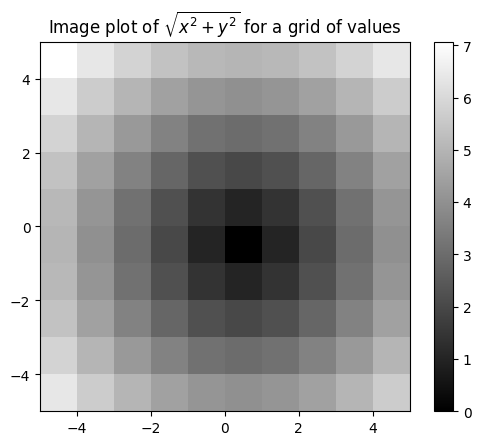

In [22]:
#############################    4.4 PROGRAMMING ON THE ARRAY BASE #################################

import numpy as np

# we want calculate sqrt x^2 + y^2
points = np.arange(-5, 5, 1) # array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])
                             # array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])
xs, ys = np.meshgrid(points, points)
xs
"""array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4],
       [-5, -4, -3, -2, -1,  0,  1,  2,  3,  4]])"""
ys
"""array([[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4],
       [-3, -3, -3, -3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4]])

"""
z = np.sqrt(xs ** 2 + ys ** 2)

import matplotlib.pyplot as plt
plt.imshow(z, cmap = plt.cm.gray, extent = [-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values")

In [52]:
# get from xarr if True and from yarr if False
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)] # [1.1, 2.2, 1.3, 1.4, 2.5]
# or faster and can use in multidemensional array
result = np.where(cond, xarr, yarr)
result # array([1.1, 2.2, 1.3, 1.4, 2.5])

rng = np.random.default_rng(seed=1)
arr = rng.standard_normal((4, 4))
"""array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723],
       [ 0.90535587,  0.44637457, -0.53695324,  0.5811181 ],
       [ 0.3645724 ,  0.2941325 ,  0.02842224,  0.54671299],
       [-0.73645409, -0.16290995, -0.48211931,  0.59884621]])

"""
arr > 0
"""array([[ True,  True,  True, False],
       [ True,  True, False,  True],
       [ True,  True,  True,  True],
       [False, False, False,  True]])"""

np.where(arr > 0, 2, -2)
"""array([[ 2,  2,  2, -2],
       [ 2,  2, -2,  2],
       [ 2,  2,  2,  2],
       [-2, -2, -2,  2]])"""

np.where(arr > 0, 2, arr)
"""array([[ 2.        ,  2.        ,  2.        , -1.30315723],
       [ 2.        ,  2.        , -0.53695324,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.73645409, -0.16290995, -0.48211931,  2.        ]])"""

array([[ 2.        ,  2.        ,  2.        , -1.30315723],
       [ 2.        ,  2.        , -0.53695324,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.73645409, -0.16290995, -0.48211931,  2.        ]])

In [27]:
##################### MATHEMATICS AND STATISTIC OPERATIONS ######################

import numpy as np

rng = np.random.default_rng(seed=3)
arr = rng.standard_normal((5, 4))
"""array([[ 2.04091912, -2.55566503,  0.41809885, -0.56776961],
       [-0.45264929, -0.21559716, -2.01998613, -0.23193238],
       [-0.86521308,  3.32299952,  0.22578661, -0.35263079],
       [-0.28128742, -0.66804635, -1.05515055, -0.39080098],
       [ 0.48194539, -0.23855361,  0.9577587 , -0.19980213]])"""

# average
arr.mean(axis=1) # array([-0.16610417, -0.73004124,  0.58273556, -0.59882132,  0.25033709])  : average by rows
(2.04091912 -2.55566503+  0.41809885 -0.56776961)/4  # -0.16610416750000007

arr.mean(axis=0) # average by column
arr.mean()   # -0.13237881544700045
np.mean(arr) # -0.13237881544700045

# sum
arr.sum() # -2.647576308940009

# cumsum
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum() # array([ 0,  1,  3,  6, 10, 15, 21, 28])

arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
"""array([[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]])"""

arr.cumsum(axis = 0) # by axis Y
"""array([[ 0,  1,  2],
          [ 3,  5,  7],
          [ 9, 12, 15]])"""

arr.cumsum(axis = 1) # by axis X
"""array([[ 0,  1,  2],
          [ 3,  5,  7],
          [ 9, 12, 15]])"""

###############  BOOL ARRAY METHODS #######################
arr = rng.standard_normal(100)
(arr < 0).sum() # 47

bools = np.array([False, True, False, False])
bools.any() # True  - so where is one True at least
bools.all() # False - so all values ar True
arr.any()  # True   - if value more 0 then True

################  SORTING #################################

arr = rng.standard_normal(6) # array([-0.97854853, -0.80117201,  0.0432959 ,  0.64097106,  2.04788606, -0.19744543])
arr.sort() # change arr
arr # array([-0.97854853, -0.80117201, -0.19744543,  0.0432959 ,  0.64097106, 2.04788606])

arr = rng.standard_normal((5, 3))
"""array([[ 0.76750256,  0.15541781,  1.75992628],
       [ 0.74215786,  1.36855045, -1.07767519],
       [-0.19224071, -0.81377242,  1.5049474 ],
       [ 0.6576399 , -0.30514443, -0.45246789],
       [ 0.48466488, -0.70149553, -0.93058888]])"""

arr.sort(axis = 0) # sorting by column
"""array([[-0.19224071, -0.81377242, -1.07767519],
       [ 0.48466488, -0.70149553, -0.93058888],
       [ 0.6576399 , -0.30514443, -0.45246789],
       [ 0.74215786,  0.15541781,  1.5049474 ],
       [ 0.76750256,  1.36855045,  1.75992628]])"""

arr = np.array([5, -10, 7, 1, 0, -3])
sorted_copy_arr = np.sort(arr)
sorted_copy_arr # array([-10,  -3,   0,   1,   5,   7])
arr             # array([  5, -10,   7,   1,   0,  -3])

# distinct sql
names = np.array(['Bob', 'Will', 'Joe', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names) # array(['Bob', 'Joe', 'Will'], dtype='<U4')
names # array(['Bob', 'Will', 'Joe', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')   - not changed

sorted(set(names)) # ['Bob', 'Joe', 'Will'] # same thing on Python

values = np.array([6, 0, 0, 3, 2, 5, 6])
mask = np.isin(values, [2, 3, 6]) # array([ True, False, False,  True,  True, False,  True])
values[mask] # array([6, 3, 2, 6])

# work with file (usually in binary format)
arr = np.arange(10) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
path = '/home/horizont/Python_Makkini/some_array.npy'
np.save(path, arr)
np.load(path) # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

path_zip = '/home/horizont/Python_Makkini/compress_array.npz'
np.savez_compressed(path_zip, a=arr, b=arr)
arch = np.load(path_zip) # object similar to a dictionary
arch['b'] # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
############################## 4.6. LINEAR ALGEBRA #####################################
import numpy as np

x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1., 7.], [8., 9.]])
x
"""array([[1., 2., 3.],
          [4., 5., 6.]])"""
y
"""array([[ 6., 23.],
          [-1.,  7.],
          [ 8.,  9.]])"""

# matrix multiplication
x.dot(y)
"""array([[ 28.,  64.],      1*6+2*(-1)+3*8 = 28, 1*23+2*7+3*9= 64
          [ 67., 181.]])"""

# same result with: np.dot(x, y)

x @ np.ones(3)
np.ones(3) # array([1., 1., 1.])

# module linalg for working with matrix
from numpy.linalg import inv, qr

X = np.array([[1, 2], [3, 4]])
"""array([[1, 2],
          [3, 4]])"""
mat = X.T @ X
"""array([[10, 14],
          [14, 20]])"""

inv(mat) # inverse matrix
"""array([[ 5. , -3.5],
          [-3.5,  2.5]])"""

mat @ inv(mat) # the unit matrix
"""array([[ 1.00000000e+00, -2.66453526e-15],
          [ 7.10542736e-15,  1.00000000e+00]])"""

array([[ 1.00000000e+00, -2.66453526e-15],
       [ 7.10542736e-15,  1.00000000e+00]])

array([419, 401, 525, ..., 231, 385, 535])

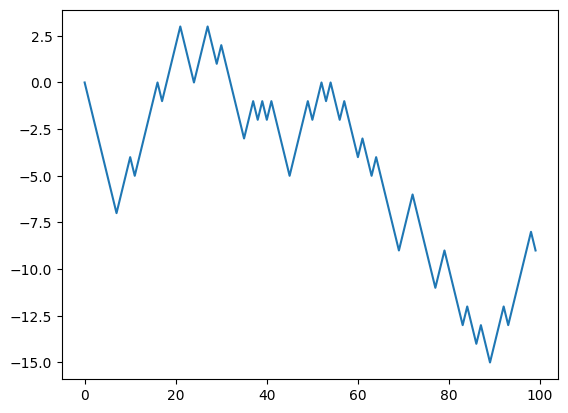

In [33]:
##############################   4.7 RANDOM WALK ###############################

# with Python
import random as rnd
import matplotlib.pyplot as plt

position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if rnd.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

# with NumPy
import numpy as np

nsteps = 1000
rng = np.random.default_rng()
draws = rng.integers(0, 2, nsteps)
"""array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0......."""
steps = np.where(draws == 0, -1, draws)
"""array([ -1, -1, 1,  -1,  -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
        1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1....."""
walk = steps.cumsum()
"""array([ 1,  2,  3,  2,  3,  2,  3,  2,  1,  2,  1,  0, -1, -2, -3, -2, -1,
        0,  1,  0,  1,  2,  3,  4,  3,  2,  3,  2,  3,  4,  5,  4,  5,  4......"""
walk.min() # -15
walk.max() # 106

# how soon will we leave start point (zero)
np.abs(walk) >= 10
"""array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False....."""
(np.abs(walk) >= 10).argmax() # 107 - it's first value True ( >= 10)

# 5000 random walks
nwalks = 5000
nsteps = 1000
draw = rng.integers(0, 2, size = (nwalks, nsteps))
"""array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1]])"""
steps = np.where(draw > 0, 1, -1)
"""array([[ 1,  1,  1, ..., -1,  1, -1],
          [-1,  1,  1, ...,  1,  1,  1],
          [ 1, -1, -1, ..., -1,  1,  1],
          ...,
          [-1, -1, -1, ...,  1, -1, -1],
          [ 1, -1,  1, ...,  1, -1, -1],
          [-1,  1, -1, ...,  1,  1, -1]])"""
walks = steps.cumsum(axis = 1) # by per rows
"""array([[  1,   2,   3, ..., -38, -39, -38],
          [  1,   0,   1, ...,  18,  19,  20],
          [  1,   0,  -1, ...,   6,   7,   6],
          ...,
          [  1,   2,   3, ..., -22, -21, -20],
          [  1,   2,   1, ...,  40,  41,  40],
          [ -1,  -2,  -1, ...,   4,   5,   6]])"""

walks.min()
walks.max()
hit30 = (np.abs(walks) >= 30).any(axis = 1) # len(hit30) = 5000 so it's all bool-rows of 'walks'
hit30 # array([ True, False,  True, ...,  True,  True,  True])
hit30.sum() # 3399 times value >= 30 because True = 1

crossing_time = (np.abs(walks[hit30]) >= 30).argmax(axis = 1)
# len(crossing_time) # 3354 so in walks we select only rows where hit30 = True
crossing_time # array([419, 401, 525, ..., 231, 385, 535]) values in walks where hit30 = True
